# **Code Team 8-  Netflix Project**
### Project 1- UMN Data Bootcamp

- Zack Crowley

In [1]:
# Dependencies:
import numpy as np
import pandas as pd
import scipy.stats as stat
from matplotlib import pyplot as plt
import country_converter as coco

## **Data Cleaning**

In [2]:
# Data 
# global netflix data from netflix.com top 10 weekly shows
netflix_df = pd.read_csv("cleaned_netflix_data.csv")
print(netflix_df.dtypes)
netflix_df.head()


week                           object
category                       object
weekly_rank                     int64
weekly_hours_viewed             int64
cumulative_weeks_in_top_10      int64
Show_title                     object
type                           object
description                    object
release_year                    int64
age_certification              object
runtime (mins)                float64
genres                         object
production_countries           object
imdb_id                        object
imdb_score                    float64
imdb_votes                    float64
drama                           int64
comedy                          int64
action                          int64
family                          int64
crime                           int64
romance                         int64
dtype: object


,week,category,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10,Show_title,type,description,release_year,age_certification,...,production_countries,imdb_id,imdb_score,imdb_votes,drama,comedy,action,family,crime,romance
0,2022-10-30,Films (English),1,68310000,1,the good nurse,movie,An infamous caregiver is implicated in the dea...,2022,R,...,United States,tt4273800,7.1,204.0,1,0,0,0,1,0
1,2022-10-30,Films (English),2,41950000,2,the school for good and evil,movie,Best friends Sophie and Agatha find themselves...,2022,PG-13,...,United States,tt2935622,5.8,18952.0,1,1,1,0,0,0
2,2022-10-30,Films (English),3,9170000,2,the stranger,SHOW,A web of secrets sends family man Adam Price o...,2020,TV-MA,...,United Kingdom,tt9698480,7.3,48298.0,1,0,0,0,1,0
3,2022-10-30,Films (English),4,8890000,1,wild is the wind,movie,An immigrant Nevada rancher brings a woman fro...,1957,Not Rated,...,United States,tt0051193,6.7,1027.0,1,0,0,0,0,0
4,2022-10-30,Films (English),5,8170000,3,the curse of bridge hollow,movie,"A teenage girl, who accidentally releases an a...",2022,TV-14,...,United States,tt15289240,NaN,4085.0,0,1,0,1,0,0


In [3]:
# Count all vars:
netflix_df.count()
# Rm extra index rows from past csv exports:
# del netflix_df["Unnamed: 0"]
# del netflix_df["Unnamed: 0.1"]
# del netflix_df["Unnamed: 0.1.1"]


week                          2069
category                      2069
weekly_rank                   2069
weekly_hours_viewed           2069
cumulative_weeks_in_top_10    2069
Show_title                    2069
type                          2069
description                   2069
release_year                  2069
age_certification             2069
runtime (mins)                2069
genres                        2069
production_countries          2065
imdb_id                       2069
imdb_score                    2062
imdb_votes                    2068
drama                         2069
comedy                        2069
action                        2069
family                        2069
crime                         2069
romance                       2069
dtype: int64

In [7]:
# Fix runtime, genre and production_country:
# Genre:
genre = netflix_df["genres"]
netflix_df["genres"] = netflix_df["genres"].str.lower()
netflix_df["genres"] = netflix_df["genres"].str.replace("[", "").str.replace("\'", "").str.replace("]", "")
print(netflix_df["genres"])

0                                 biography, crime, drama
1                                   action, comedy, drama
2                                  thriller, crime, drama
3                                                   drama
4                               adventure, comedy, family
                              ...                        
2064                               thriller, drama, crime
2065                               thriller, drama, crime
2066                               thriller, drama, crime
2067                               drama, thriller, scifi
2068    animation, action, scifi, drama, fantasy, thri...
Name: genres, Length: 2069, dtype: object


In [15]:
# age_certification:
netflix_df["age_certification"].unique()

array(['R', 'PG-13', 'TV-MA', 'Not Rated', 'TV-14', 'PG', 'Passed',
       'TV-PG', 'NC-17', 'TV-Y7', 'G', 'TV-Y', 'TV-G', 'Unrated'],
      dtype=object)

In [31]:
# Change imdb_votes to float:
# netflix_df['imdb_votes'] = netflix_df['imdb_votes'].str.replace(",","").astype(float)
# netflix_df['imdb_votes'].dtypes 

# change imdb_score and imdb_votes to drop nan's:
# First change to str:
# imdb_score
netflix_df["imdb_score"]= netflix_df["imdb_score"].astype(str)
netflix_df.loc[netflix_df["imdb_score"]=="nan"].count()["imdb_score"]
netflix_df["imdb_score"] = netflix_df["imdb_score"].replace("nan", "0")
netflix_df["imdb_score"]= netflix_df["imdb_score"].astype(float)

# imdb_score
netflix_df["imdb_votes"]= netflix_df["imdb_votes"].astype(str)
netflix_df.loc[netflix_df["imdb_votes"]=="nan"].count()["imdb_votes"]
netflix_df["imdb_votes"] = netflix_df["imdb_votes"].replace("nan", "0")
netflix_df["imdb_votes"]= netflix_df["imdb_votes"].astype(float)


In [8]:
#add an indicator var for each of the following from the genres column,  if contained in 'genres' then 1, otherwise 0:
netflix_df['drama'] = netflix_df['genres'].str.contains('drama').astype(int)
netflix_df['comedy'] = netflix_df['genres'].str.contains('comedy').astype(int)
netflix_df['action'] = netflix_df['genres'].str.contains('action').astype(int)
netflix_df['family'] = netflix_df['genres'].str.contains('family').astype(int)
netflix_df['crime'] = netflix_df['genres'].str.contains('crime').astype(int)
netflix_df['romance'] = netflix_df['genres'].str.contains('romance').astype(int)

In [ ]:
# Runtime, make all float type and rename, all in minutes:
netflix_df["runtime"] = netflix_df["runtime"].str.rstrip(' min').str.rstrip('.0')
netflix_df["runtime"] = netflix_df["runtime"].replace(np.nan, "0").replace("","0")
netflix_df["runtime"] = netflix_df["runtime"].astype(float)
netflix_df["runtime"].unique()
# Rename col to specifiy runtime is in minutes:
netflix_df.rename({'runtime': 'runtime (mins)'}, axis=1, inplace=True)


In [ ]:
# Year (just the first 4 char)):
netflix_df["release_year"] = netflix_df["release_year"].str[:4]
netflix_df["release_year"] 

In [13]:
# production_country:
# netflix_df["production_countries"].unique()
# netflix_df["production_countries"] = netflix_df["production_countries"].str.replace("[", "").str.replace("\'", "").str.str.replace("]", "")("]", "")

# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("US","United States")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AU","Australia")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GB","United Kingdom")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CA","Canada")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JP","Japan")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KR","South Korea")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ES","Spain")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CZ","Czech Republic")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("MX","Mexico")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IT","Italy")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LU","Luxembourg")    
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IN","India")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PL","Poland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DE","Germany")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BE","Belgium")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TR","Turkey")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("ZA","South Africa")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CL","Chile")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NG","Nigeria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("KN","Saint Kitts and Nevis")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CO","Columbia")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BG","Bulgaria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("FR","France")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AR","Argentina")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("AT","Austria")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("BR","Brazil")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("QA","Qatar")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("CH","Switzerland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HU","Hungary")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("PE","Peru")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("DK","Denmark")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("LT","Lithuania")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("GR","Greece")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IE","Ireland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IL","Israel")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("IS","Iceland")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("JO","Jordan")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NL","Netherlands")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("HK","Hong Kong")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("NZ","New Zealand")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SE","Sweden")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("SG","Singaport")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("RO","Romania")
# netflix_df['production_countries'] = netflix_df['production_countries'].str.replace("TH","Thailand")

prod_cntry = netflix_df["production_countries"]
prod_cntry.unique()

array(['United States', 'United Kingdom', 'Japan, United States, France',
       'South Korea', 'Poland', 'Japan', 'India',
       'United States, Canada, Vietnam', 'United States, Mexico',
       'Germany', 'United States, United Kingdom',
       'United States, Germany', 'Netherlands', 'Denmark',
       'Canada, United States', 'Sweden', 'Colombia, United States',
       'Italy', 'Belgium, United States', 'Mexico, Colombia', 'Australia',
       'Canada', 'France', 'Poland, United States',
       'United States, Argentina', 'United States, South Korea',
       'United States, Canada', 'Mexico', 'United Kingdom, United States',
       'Thailand, United States',
       'United States, China, United Kingdom, Japan', 'Spain',
       'United States, France, Japan', 'Australia, United States',
       'Brazil', 'Norway', 'United States, United Kingdom, Germany',
       'Turkey', 'Iceland', 'United States, Czech Republic',
       'Hong Kong, China', 'Italy, Spain', 'South Africa',
       'Uni

In [32]:
# Export csv:
# print(netflix_df.dtypes)
# netflix_df.to_csv("cleaned_netflix_data.csv", index=False)

## **Analysis- Exploratory**:
#### Correlations: 
- runtime and imdb rating or votes
- age_certification and imdb score or votes 

In [33]:
# Create df's for each of the 4 categories: Show/film and English/Non-English
# var = category
eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (English)"]
eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (English)"]
non_eng_film_df = netflix_df.loc[netflix_df["category"]=="Films (Non-English)"]
non_eng_show_df = netflix_df.loc[netflix_df["category"]=="TV (Non-English)"]

# Count all:
print(f"English Films:",eng_film_df["Show_title"].nunique())
print(f"English Show:",eng_show_df["Show_title"].nunique())
print(f"Non-English Films:",non_eng_film_df["Show_title"].nunique())
print(f"Non-English Show:",non_eng_show_df["Show_title"].nunique())
# Not a lot of Non-english films by comparison.
print(f"total unique shows:",eng_film_df["Show_title"].nunique() + eng_show_df["Show_title"].nunique() + 
                            non_eng_film_df["Show_title"].nunique()+non_eng_show_df["Show_title"].nunique())


English Films: 263
English Show: 152
Non-English Films: 92
Non-English Show: 139
total unique shows: 646


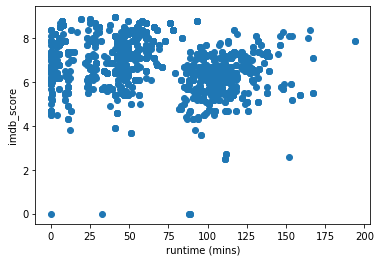

In [34]:
# Plot Overall for whole data set- runtime versus imdb rating on a scatterplot
plt.scatter(netflix_df["runtime (mins)"],netflix_df["imdb_score"])
plt.xlabel('runtime (mins)')
plt.ylabel('imdb_score')
plt.show()



In [36]:
# Overall corr for whole data set:
corr_runtime_score_all = stat.pearsonr(netflix_df["runtime (mins)"],netflix_df["imdb_score"])
print(corr_runtime_score_all)
# Correlation broken down by 4 categories:
# Eng film
corr_runtime_eng_film = stat.pearsonr(eng_film_df["runtime (mins)"],eng_film_df["imdb_score"])
print(corr_runtime_eng_film)
# Non Eng film
corr_runtime_non_eng_film = stat.pearsonr(non_eng_film_df["runtime (mins)"],non_eng_film_df["imdb_score"])
print(corr_runtime_non_eng_film)
# Eng Show
corr_runtime_eng_show = stat.pearsonr(eng_show_df["runtime (mins)"],eng_show_df["imdb_score"])
print(corr_runtime_eng_show)
# Non Eng Show
corr_runtime_non_eng_show = stat.pearsonr(non_eng_show_df["runtime (mins)"],non_eng_show_df["imdb_score"])
print(corr_runtime_non_eng_show)



(-0.27339021092878113, 8.658191362423022e-37)
(0.06502231297937243, 0.1216499617366376)
(0.06258594434092714, 0.35999099023797254)
(0.19506989099992372, 2.5100267292110605e-07)
(0.1504049326972704, 0.0002258193182277164)


In [48]:
# Corr matrix for whole dataset:
corr_matrix = netflix_df.corr()
# print(corr_matrix)

# Largest positive corr:
print(corr_matrix.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix.unstack().sort_values().head(22))


drama                       weekly_hours_viewed           0.152159
weekly_hours_viewed         drama                         0.152159
action                      crime                         0.155658
crime                       action                        0.155658
family                      comedy                        0.157510
comedy                      family                        0.157510
cumulative_weeks_in_top_10  romance                       0.164458
romance                     cumulative_weeks_in_top_10    0.164458
imdb_votes                  cumulative_weeks_in_top_10    0.171050
cumulative_weeks_in_top_10  imdb_votes                    0.171050
comedy                      romance                       0.183360
romance                     comedy                        0.183360
imdb_votes                  weekly_hours_viewed           0.202867
weekly_hours_viewed         imdb_votes                    0.202867
cumulative_weeks_in_top_10  drama                         0.20

In [44]:
# Corr matrix for Eng film dataset:
corr_matrix_eng_film = eng_film_df.corr()
print(corr_matrix_eng_film)

# Largest positive corr:
print(corr_matrix_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_film.unstack().sort_values().head(22))


                            weekly_rank  weekly_hours_viewed  \
weekly_rank                    1.000000            -0.660030   
weekly_hours_viewed           -0.660030             1.000000   
cumulative_weeks_in_top_10     0.154495            -0.153576   
release_year                  -0.329650             0.267099   
runtime (mins)                -0.068526             0.095947   
imdb_score                     0.130763            -0.064924   
imdb_votes                     0.180571            -0.088650   
drama                         -0.160373             0.128862   
comedy                        -0.053461             0.074368   
action                         0.024483            -0.002024   
family                         0.002407            -0.040737   
crime                          0.023184             0.012904   
romance                       -0.142027             0.102221   

                            cumulative_weeks_in_top_10  release_year  \
weekly_rank                    

In [45]:
# Corr matrix for Eng show dataset:
corr_matrix_eng_show = eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_eng_show.unstack().sort_values().head(22))


weekly_hours_viewed         drama                         0.194010
drama                       weekly_hours_viewed           0.194010
imdb_score                  runtime (mins)                0.195070
runtime (mins)              imdb_score                    0.195070
cumulative_weeks_in_top_10  imdb_score                    0.197123
imdb_score                  cumulative_weeks_in_top_10    0.197123
weekly_hours_viewed         imdb_votes                    0.205390
imdb_votes                  weekly_hours_viewed           0.205390
weekly_hours_viewed         runtime (mins)                0.213661
runtime (mins)              weekly_hours_viewed           0.213661
drama                       cumulative_weeks_in_top_10    0.261578
cumulative_weeks_in_top_10  drama                         0.261578
drama                       imdb_votes                    0.272466
imdb_votes                  drama                         0.272466
                            runtime (mins)                0.28

In [46]:
# Corr matrix for Non Eng show dataset:
corr_matrix_non_eng_show = non_eng_show_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_show.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_show.unstack().sort_values().head(22))

drama                       imdb_score                    0.230588
imdb_score                  drama                         0.230588
action                      crime                         0.231865
crime                       action                        0.231865
imdb_score                  romance                       0.243651
romance                     imdb_score                    0.243651
comedy                      cumulative_weeks_in_top_10    0.255358
cumulative_weeks_in_top_10  comedy                        0.255358
imdb_score                  imdb_votes                    0.258117
imdb_votes                  imdb_score                    0.258117
crime                       imdb_votes                    0.280693
imdb_votes                  crime                         0.280693
cumulative_weeks_in_top_10  romance                       0.284828
romance                     cumulative_weeks_in_top_10    0.284828
imdb_votes                  weekly_hours_viewed           0.32

In [47]:
# Corr matrix for Non Eng film dataset:
corr_matrix_non_eng_film = non_eng_film_df.corr()
# print(corr_matrix_eng_show)

# Largest positive corr:
print(corr_matrix_non_eng_film.unstack().sort_values().tail(35))

# Largest negative corr:
print(corr_matrix_non_eng_film.unstack().sort_values().head(22))

romance                     release_year                  0.170258
release_year                romance                       0.170258
drama                       cumulative_weeks_in_top_10    0.171165
cumulative_weeks_in_top_10  drama                         0.171165
comedy                      cumulative_weeks_in_top_10    0.203553
cumulative_weeks_in_top_10  comedy                        0.203553
action                      crime                         0.204871
crime                       action                        0.204871
weekly_rank                 family                        0.226541
family                      weekly_rank                   0.226541
imdb_votes                  imdb_score                    0.263592
imdb_score                  imdb_votes                    0.263592
runtime (mins)              action                        0.280729
action                      runtime (mins)                0.280729
cumulative_weeks_in_top_10  weekly_rank                   0.29

In [51]:
# Corr matrix for only dramas in the dataset:
drama_df = netflix_df.loc[netflix_df["drama"]==1]
corr_matrix_drama = drama_df.corr()
# print(corr_matrix)

# Largest positive corr:
print(corr_matrix_drama.unstack().sort_values().tail(55))

# Largest negative corr:
print(corr_matrix_drama.unstack().sort_values().head(22))

cumulative_weeks_in_top_10  comedy                        0.126413
comedy                      cumulative_weeks_in_top_10    0.126413
action                      crime                         0.140254
crime                       action                        0.140254
weekly_rank                 cumulative_weeks_in_top_10    0.160164
cumulative_weeks_in_top_10  weekly_rank                   0.160164
romance                     cumulative_weeks_in_top_10    0.165195
cumulative_weeks_in_top_10  romance                       0.165195
imdb_votes                  cumulative_weeks_in_top_10    0.168269
cumulative_weeks_in_top_10  imdb_votes                    0.168269
romance                     comedy                        0.227082
comedy                      romance                       0.227082
imdb_votes                  weekly_hours_viewed           0.237000
weekly_hours_viewed         imdb_votes                    0.237000
cumulative_weeks_in_top_10  imdb_score                    0.30

In [52]:
# Total hours viewed for each rank for English-films, how much time is the top show watched vs. number two vs. number three, etc.
eng_film_df.groupby("weekly_rank").sum()["weekly_hours_viewed"]


weekly_rank
1     3257790000
2     1474600000
3     1000190000
4      930600000
5      703090000
6      514550000
7      466540000
8      438960000
9      384220000
10     356850000
Name: weekly_hours_viewed, dtype: int64